In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


In [3]:
import sklearn
sklearn.__version__

'1.3.2'

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, mean_squared_error, mean_absolute_error, r2_score

# Загружаем все файлы с данными

In [5]:
file1_name = "/content/gdrive/MyDrive/TSU/Lab_Neural_Network/Lab1/bank.csv"
file2_name = "/content/gdrive/MyDrive/TSU/Lab_Neural_Network/Lab1/fetal_health.csv"
file3_name = "/content/gdrive/MyDrive/TSU/Lab_Neural_Network/Lab1/DS_2019.csv"

# Бинарный классификатор

In [ ]:
data1 = pd.read_csv(file1_name, sep=';')
data1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
data1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Transform every categorical data to numerical

### Job

In [ ]:
data1['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [ ]:
data1['job'] = data1['job'].replace({'admin.': 'admin'})
data1['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [ ]:
job_dict = {
    'unemployed': -1,
    'services': 1,
    'management': 2,
    'blue-collar': 3,
    'self-employed': 4,
    'technician': 5,
    'entrepreneur': 6,
    'admin': 7,
    'student': 8,
    'housemaid': 9,
    'retired': 10,
    'unknown': 0
}
data1['job'] = data1['job'].map(job_dict)

In [ ]:
data1['job'].head()

0   -1
1    1
2    2
3    2
4    3
Name: job, dtype: int64

### Marital

In [ ]:
data1['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
marital_dict = {'married': 0, 'single': 1, 'divorced': 2}
data1['marital'] = data1['marital'].map(marital_dict)

In [ ]:
data1['marital'].head()

0    0
1    0
2    1
3    0
4    0
Name: marital, dtype: int64

### Education

In [ ]:
data1['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [ ]:
education_dict = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0}
data1['education'] = data1['education'].map(education_dict)

In [ ]:
data1['education'].head()

0    1
1    2
2    3
3    3
4    2
Name: education, dtype: int64

### Default (has credit or not)

In [ ]:
data1['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
default_dict = {'no': 0, 'yes': 1}
data1['default'] = data1['default'].map(default_dict)

In [ ]:
data1['default'].head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

### Housing

In [ ]:
data1['housing'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
housing_dict = {'yes': 1, 'no': 0}
data1['housing'] = data1['housing'].map(housing_dict)

In [ ]:
data1['housing'].head()

0    0
1    1
2    1
3    1
4    1
Name: housing, dtype: int64

### Loan

In [ ]:
data1['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
loan_dict = {'no': 0, 'yes': 1}
data1['loan'] = data1['loan'].map(loan_dict)

In [ ]:
data1['loan'].head()

0    0
1    1
2    0
3    1
4    0
Name: loan, dtype: int64

### Contact

In [ ]:
data1['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [ ]:
contact_dict = {'unknown': 0, 'cellular': 1, 'telephone': 2}
data1['contact'] = data1['contact'].map(contact_dict)

In [ ]:
data1['contact'].head()

0    1
1    1
2    1
3    0
4    0
Name: contact, dtype: int64

### Month

In [ ]:
data1['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [ ]:
month_dict = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

data1['month'] = data1['month'].map(month_dict)

In [ ]:
data1['month'].head()

0    10
1     5
2     4
3     6
4     5
Name: month, dtype: int64

### Poutcome

In [ ]:
data1['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
poutcome_dict = {'unknown': 0, 'success': 1, 'failure': 2, 'other': 3}
data1['poutcome'] = data1['poutcome'].map(poutcome_dict)

In [ ]:
data1['poutcome'].head()

0    0
1    2
2    2
3    0
4    0
Name: poutcome, dtype: int64

## Add Target based on attribute y

In [ ]:
binary_class = {'no':0,'yes':1}
data1['Target'] = data1['y'].map(binary_class)

In [ ]:
data1[['y', 'Target']].head(15)

,y,Target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
5,no,0
6,no,0
7,no,0
8,no,0
9,no,0


In [ ]:
data1['Target'].value_counts()

0    4000
1     521
Name: Target, dtype: int64

## Divide data into X and y

In [ ]:
X = data1.drop(['y', 'Target'], axis=1)
y = data1['Target']

## Split data to train, test, and validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)

## Normalize data

In [ ]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

In [ ]:
ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

## Train Model

In [ ]:
model = LogisticRegression(C=0.02)
model.fit(X_train, y_train)

LogisticRegression(C=0.02)

In [ ]:
y_prediction = model.predict(X_test)

In [ ]:
recall = recall_score(y_test, y_prediction, average='weighted')
precision = precision_score(y_test, y_prediction, average='weighted')
weighted_accuracy = accuracy_score(y_test, y_prediction)
auc = roc_auc_score(y_test, y_prediction)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Weighted Accuracy: {weighted_accuracy:.2f}")
print(f"AUC: {auc:.2f}")

Recall: 0.88
Precision: 0.85
Weighted Accuracy: 0.88
AUC: 0.56


## TensorFlow

In [ ]:
binary_model = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation='relu',input_dim=16),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
binary_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 85        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
binary_model.compile(loss='binary_crossentropy',
                     optimizer='adam',
                      metrics='accuracy')

In [ ]:
binary_model_history = binary_model.fit(X_train, y_train,
                      validation_data=(X_val,y_val),
                      batch_size=100, epochs=4)

Epoch 1/4
28/28 [==============================] - 1s 10ms/step - loss: 0.5836 - accuracy: 0.7021 - val_loss: 31.9887 - val_accuracy: 0.8260
Epoch 2/4
28/28 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.7504 - val_loss: 31.1740 - val_accuracy: 0.8245
Epoch 3/4
28/28 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.7872 - val_loss: 30.3685 - val_accuracy: 0.8230
Epoch 4/4
28/28 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.8215 - val_loss: 29.1835 - val_accuracy: 0.8215


In [ ]:
y_prob = binary_model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
weighted_accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Weighted Accuracy: {weighted_accuracy:.2f}")
print(f"AUC: {auc:.2f}")

36/36 [==============================] - 0s 1ms/step
Recall: 0.84
Precision: 0.80
Weighted Accuracy: 0.84
AUC: 0.67


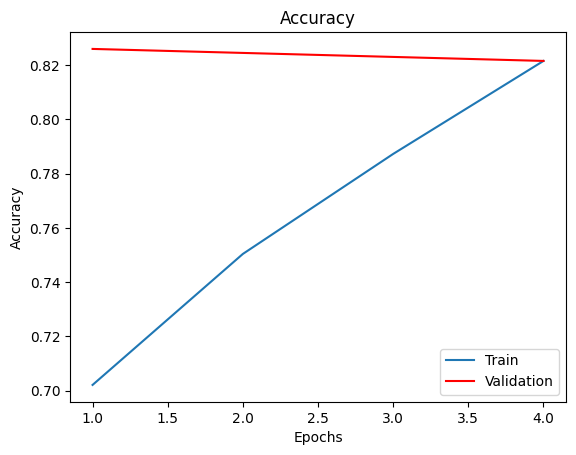

In [ ]:
acc = binary_model_history.history['accuracy']
val_acc = binary_model_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy')
plt.plot(epochs,acc,label='Train')
plt.plot(epochs,val_acc,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

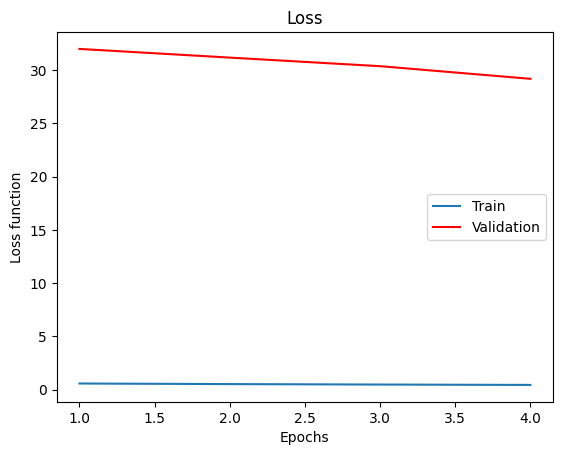

In [ ]:
loss_function = binary_model_history.history['loss']
val_loss_function = binary_model_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss')
plt.plot(epochs,loss_function,label='Train')
plt.plot(epochs,val_loss_function,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

# Многоклассовый классификатор

In [ ]:
data2 = pd.read_csv(file2_name)
data2.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [ ]:
data2.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
X = data2.drop('fetal_health', axis=1)
y = data2['fetal_health']

## Split data to train, test, and validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)

## Normalize data

In [ ]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

In [ ]:
ss_test = StandardScaler()
X_test = ss_train.fit_transform(X_test)

In [ ]:
print(f'Размер исходного набора: X: {X.shape}; y: {y.shape}')
print(f'Размер обучающего набора: X: {X_train.shape}; y: {y_train.shape}')
print(f'Размер тестового набора: X: {X_test.shape}; y: {y_test.shape}')

Размер исходного набора: X: (2126, 21); y: (2126,)
Размер обучающего набора: X: (1275, 21); y: (1275,)
Размер тестового набора: X: (532, 21); y: (532,)


## Support Vector Machine

In [ ]:
model_svm = SVC(kernel='linear', C=1.0, probability = True, decision_function_shape='ovr')
model_svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_prediction = model_svm.predict(X_test)

### Recall, Precision, Weighted accuracy

In [ ]:
recall = recall_score(y_test, y_prediction, average='weighted')
precision = precision_score(y_test, y_prediction, average='weighted')
weighted_accuracy = accuracy_score(y_test, y_prediction)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Weighted Accuracy: {weighted_accuracy:.2f}")

Recall: 0.89
Precision: 0.89
Weighted Accuracy: 0.89


### AUC Score

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(532, 3)

In [ ]:
label_encoder = LabelEncoder()
y_prediction_encoded = label_encoder.fit_transform(y_prediction)

#### AUC for Normal (1)

In [ ]:
label_binarizer.transform([1])

array([[1, 0, 0]])

In [ ]:
health_of_interest = 1
health_id = np.flatnonzero(label_binarizer.classes_ == health_of_interest)[0]
health_id

0

In [ ]:
auc_score_1 = roc_auc_score(y_onehot_test[:, health_id], y_prediction_encoded)

In [ ]:
print(f"AUC for Normal (1): {auc_score_1:.2f}")

AUC for Normal (1): 0.12


#### AUC for Suspect (2)

In [ ]:
label_binarizer.transform([2])

array([[0, 1, 0]])

In [ ]:
health_of_interest = 2
health_id = np.flatnonzero(label_binarizer.classes_ == health_of_interest)[0]
health_id

1

In [ ]:
auc_score_2 = roc_auc_score(y_onehot_test[:, health_id], y_prediction_encoded)

In [ ]:
print(f"AUC for Suspect (2): {auc_score_2:.2f}")

AUC for Suspect (2): 0.78


#### AUC for Pathological (3)

In [ ]:
label_binarizer.transform([3])

array([[0, 0, 1]])

In [ ]:
health_of_interest = 3
health_id = np.flatnonzero(label_binarizer.classes_ == health_of_interest)[0]
health_id

2

In [ ]:
auc_score_3 = roc_auc_score(y_onehot_test[:, health_id], y_prediction_encoded)

In [ ]:
print(f"AUC for Pathological (3): {auc_score_3:.2f}")

AUC for Pathological (3): 0.93


#### Summary AUC score

In [ ]:
print(f"AUC for Normal (1): {auc_score_1:.2f}")
print(f"AUC for Suspect (2): {auc_score_2:.2f}")
print(f"AUC for Pathological (3): {auc_score_3:.2f}")

AUC for Normal (1): 0.12
AUC for Suspect (2): 0.78
AUC for Pathological (3): 0.93


## Random Forest Classifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_prediction = model_rf.predict(X_test)

### Recall, Precission, Weighted Accuracy

In [ ]:
recall = recall_score(y_test, y_prediction, average='weighted')
precision = precision_score(y_test, y_prediction, average='weighted')
weighted_accuracy = accuracy_score(y_test, y_prediction)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Weighted Accuracy: {weighted_accuracy:.2f}")

Recall: 0.93
Precision: 0.92
Weighted Accuracy: 0.93


### AUC ROC Score

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(532, 3)

In [ ]:
label_encoder = LabelEncoder()
y_prediction_encoded = label_encoder.fit_transform(y_prediction)

#### AUC ROC for Normal (1)

##### AUC

In [ ]:
label_binarizer.transform([1])

array([[1, 0, 0]])

In [ ]:
health_of_interest = 1
health_id = np.flatnonzero(label_binarizer.classes_ == health_of_interest)[0]
health_id

0

In [ ]:
auc_score_1 = roc_auc_score(y_onehot_test[:, health_id], y_prediction_encoded)

In [ ]:
print(f"AUC for Normal (1): {auc_score_1:.2f}")

AUC for Normal (1): 0.11


##### ROC

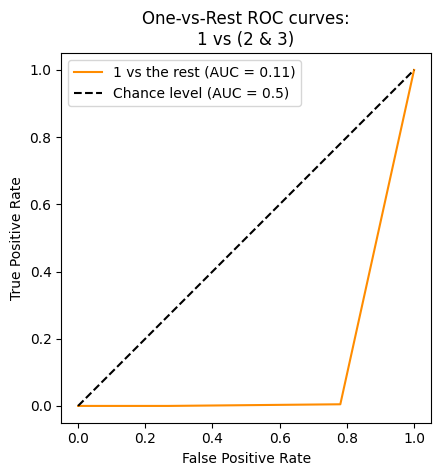

In [ ]:
roc_display_1 = RocCurveDisplay.from_predictions(
    y_onehot_test[:, health_id],
    y_prediction_encoded,
    name=f"{health_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n1 vs (2 & 3)")
plt.legend()
plt.show()

#### AUC ROC for Suspect (2)

##### AUC

In [ ]:
label_binarizer.transform([2])

array([[0, 1, 0]])

In [ ]:
health_of_interest = 2
health_id = np.flatnonzero(label_binarizer.classes_ == health_of_interest)[0]
health_id

1

In [ ]:
auc_score_2 = roc_auc_score(y_onehot_test[:, health_id], y_prediction_encoded)

In [ ]:
print(f"AUC for Suspect (2): {auc_score_2:.2f}")

AUC for Suspect (2): 0.78


##### ROC

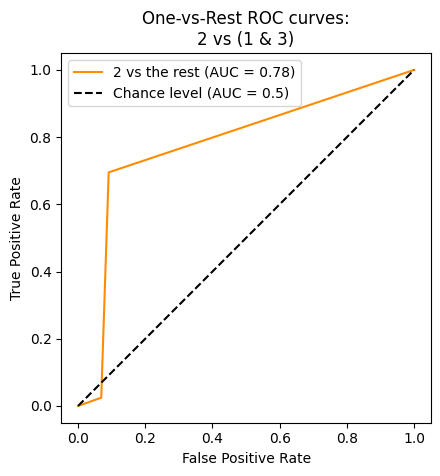

In [ ]:
roc_display_2 = RocCurveDisplay.from_predictions(
    y_onehot_test[:, health_id],
    y_prediction_encoded,
    name=f"{health_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n2 vs (1 & 3)")
plt.legend()
plt.show()

#### AUC ROC for Pathological (3)

##### AUC

In [ ]:
label_binarizer.transform([3])

array([[0, 0, 1]])

In [ ]:
health_of_interest = 3
health_id = np.flatnonzero(label_binarizer.classes_ == health_of_interest)[0]
health_id

2

In [ ]:
auc_score_3 = roc_auc_score(y_onehot_test[:, health_id], y_prediction_encoded)

In [ ]:
print(f"AUC for Pathological (3): {auc_score_3:.2f}")

AUC for Pathological (3): 0.96


##### ROC

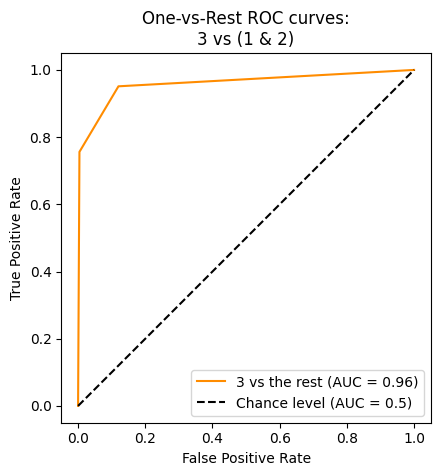

In [ ]:
roc_display_3 = RocCurveDisplay.from_predictions(
    y_onehot_test[:, health_id],
    y_prediction_encoded,
    name=f"{health_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n3 vs (1 & 2)")
plt.legend()
plt.show()

#### Summary AUC score

In [ ]:
print(f"AUC for Normal (1): {auc_score_1:.2f}")
print(f"AUC for Suspect (2): {auc_score_2:.2f}")
print(f"AUC for Pathological (3): {auc_score_3:.2f}")

AUC for Normal (1): 0.11
AUC for Suspect (2): 0.78
AUC for Pathological (3): 0.96


## Decision Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=6)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_prediction = model_dt.predict(X_test)

### Recall, Precision, Weighted Accuracy

In [ ]:
recall = recall_score(y_test, y_prediction, average='weighted')
precision = precision_score(y_test, y_prediction, average='weighted')
weighted_accuracy = accuracy_score(y_test, y_prediction)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Weighted Accuracy: {weighted_accuracy:.2f}")

Recall: 0.90
Precision: 0.89
Weighted Accuracy: 0.90


### AUC Score

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(532, 3)

In [ ]:
label_encoder = LabelEncoder()
y_prediction_encoded = label_encoder.fit_transform(y_prediction)

#### AUC for Normal (1)

In [ ]:
label_binarizer.transform([1])

array([[1, 0, 0]])

In [ ]:
health_of_interest = 1
health_id = np.flatnonzero(label_binarizer.classes_ == health_of_interest)[0]
health_id

0

In [ ]:
auc_score_1 = roc_auc_score(y_onehot_test[:, health_id], y_prediction_encoded)

In [ ]:
print(f"AUC for Normal (1): {auc_score_1:.2f}")

AUC for Normal (1): 0.14


#### AUC for Suspect (2)

In [ ]:
label_binarizer.transform([2])

array([[0, 1, 0]])

In [ ]:
health_of_interest = 2
health_id = np.flatnonzero(label_binarizer.classes_ == health_of_interest)[0]
health_id

1

In [ ]:
auc_score_2 = roc_auc_score(y_onehot_test[:, health_id], y_prediction_encoded)

In [ ]:
print(f"AUC for Suspect (2): {auc_score_2:.2f}")

AUC for Suspect (2): 0.75


#### AUC for Pathological (3)

In [ ]:
label_binarizer.transform([3])

array([[0, 0, 1]])

In [ ]:
health_of_interest = 3
health_id = np.flatnonzero(label_binarizer.classes_ == health_of_interest)[0]
health_id

2

In [ ]:
auc_score_3 = roc_auc_score(y_onehot_test[:, health_id], y_prediction_encoded)

In [ ]:
print(f"AUC for Pathological (3): {auc_score_3:.2f}")

AUC for Pathological (3): 0.94


#### Summary AUC Score

In [ ]:
print(f"AUC for Normal (1): {auc_score_1:.2f}")
print(f"AUC for Suspect (2): {auc_score_2:.2f}")
print(f"AUC for Pathological (3): {auc_score_3:.2f}")

AUC for Normal (1): 0.14
AUC for Suspect (2): 0.75
AUC for Pathological (3): 0.94


## TensorFlow

In [ ]:
y_train_c = to_categorical(y_train)
y_val_c = to_categorical(y_val)
y_test_c = to_categorical(y_test)

In [ ]:
X_train.shape

(1275, 21)

In [ ]:
multi_class_model = tf.keras.Sequential([
    tf.keras.layers.Dense(11,activation='relu',input_dim=21),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
multi_class_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 11)                242       
                                                                 
 dense_32 (Dense)            (None, 4)                 48        
                                                                 
Total params: 290 (1.13 KB)
Trainable params: 290 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
learning_rate = 0.001  # You can adjust the learning rate as needed
optimizer = tf.keras.optimizers.Adagrad(learning_rate=learning_rate)

In [ ]:
multi_class_model.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,
                      metrics='accuracy')

In [ ]:
multi_class_model_history = multi_class_model.fit(X_train, y_train_c,
                      validation_data=(X_val,y_val_c),
                      epochs=90)

Epoch 1/90
40/40 [==============================] - 1s 8ms/step - loss: 2.0894 - accuracy: 0.0549 - val_loss: 92.0129 - val_accuracy: 0.0564
Epoch 2/90
40/40 [==============================] - 0s 4ms/step - loss: 2.0071 - accuracy: 0.0596 - val_loss: 85.8079 - val_accuracy: 0.0564
Epoch 3/90
40/40 [==============================] - 0s 3ms/step - loss: 1.9521 - accuracy: 0.0659 - val_loss: 81.0012 - val_accuracy: 0.0564
Epoch 4/90
40/40 [==============================] - 0s 3ms/step - loss: 1.9084 - accuracy: 0.0722 - val_loss: 76.9891 - val_accuracy: 0.0564
Epoch 5/90
40/40 [==============================] - 0s 3ms/step - loss: 1.8715 - accuracy: 0.0753 - val_loss: 73.4840 - val_accuracy: 0.0596
Epoch 6/90
40/40 [==============================] - 0s 3ms/step - loss: 1.8392 - accuracy: 0.0800 - val_loss: 70.3538 - val_accuracy: 0.0596
Epoch 7/90
40/40 [==============================] - 0s 3ms/step - loss: 1.8104 - accuracy: 0.0847 - val_loss: 67.5184 - val_accuracy: 0.0596
Epoch 8/90
40

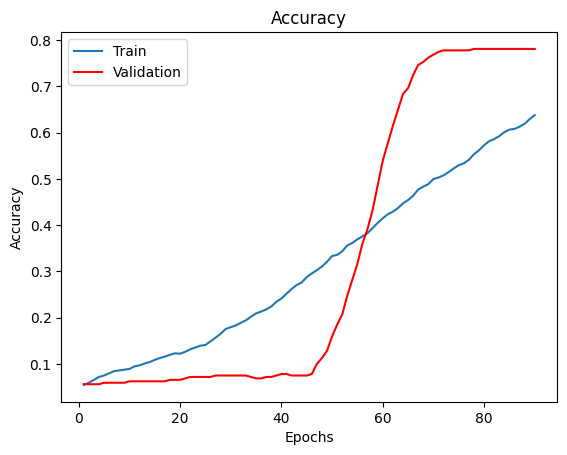

In [ ]:
acc = multi_class_model_history.history['accuracy']
val_acc = multi_class_model_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy')
plt.plot(epochs,acc,label='Train')
plt.plot(epochs,val_acc,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

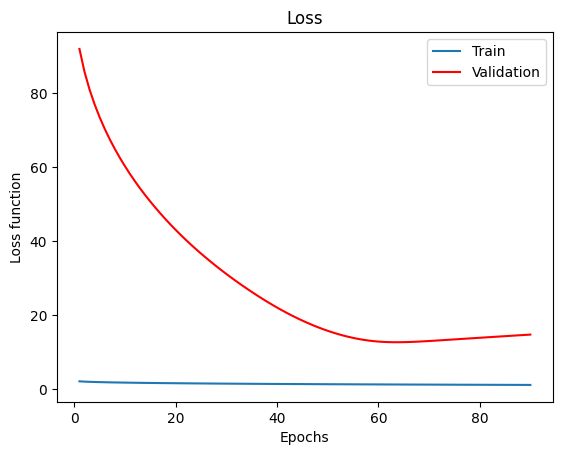

In [ ]:
loss_function = multi_class_model_history.history['loss']
val_loss_function = multi_class_model_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss')
plt.plot(epochs,loss_function,label='Train')
plt.plot(epochs,val_loss_function,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

# Регрессор

In [11]:
data3 = pd.read_csv(file3_name)
data3.head(10).style

<ipython-input-11-c8396cc9d27e>:1: DtypeWarning: Columns (30,56,96,114) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv(file3_name)


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,NWEIGHT,TOTHSQFT,HEATHOME,NUMPC,DOLLAREL,DOLELOTH,CUFEETNGSPH,BTUNGSPH,DOLNGSPH,TEMPHOME,TOTCSQFT,BTUFOSPH,AIRCOND,ELCOOL,GALLONFOSPH,WALLTYPE,TOTALDOLOTH,BTUFO,GALLONFO,DOLFOSPH,DOLLARFO,KWHSPH,BTUELSPH,FOWARM,USEFO,TOTUSQFT,TOTALDOL,NUMTHERM,DOLELSPH,CONCRETE,CUFEETNG,BTUNG,GALLONFOOTH,BTUFOOTH,BEDROOMS,FOWATER,GALLONFOWTH,BTUFOWTH,DOLFOWTH,GALLONKEROTH,BTUKEROTH,DOLKEROTH,TOTUCSQFT,TOTSQFT,TOTSQFT_EN,DOLNGWTH,DOLFOOTH,ELOTHER,DOLLARNG,FUELHEAT,NOTMOIST,GALLONKER,BTUKER,NUMCFAN,FOILAUX,TOTALBTU,COOLTYPE,DOOR1SUM,DOLLARKER,DOLLPOTH,DOLELWTH,KWHWTH,BTUELWTH,TOTROOMS,ELWATER,GALLONKERSPH,BTUKERSPH,TOTALBTUOTH,GALLONLPSPH,BTULPSPH,NCOMBATH,OVEN,EQUIPM,STORIES,GALLONLP,BTULP,LGT1,SOLWARM,FUELH2O,GALLONLPOTH,BTULPOTH,TVCOLOR,SOLARAUX,CUFEETNGOTH,BTUNGOTH,KWHOTH,DOLKERSPH,TOTALDOLWTH,DOLLPSPH,USENG,YEARMADE,BTUELOTH,KWH,BTUEL,DOLLARLP,CUFEETNGWTH,BTUNGWTH,UGWATER,SDESCENT,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998000,620.979000,621,368,38606,0,8599.172010,2736,1,2,475,337.315000,376.643000,38605.955000,367.654000,70,2736,0.000000,1,1,0.000000,2,501,0,0,0.000000,0,0.000000,0.000000,0,0,400,1293,1,0,0,838,85895,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,400,3136,2736,286.745000,0.000000,1,818,1,0,0,0,0,0,103460,1,0,0,0.000000,0.000000,0.000000,0.000000,4,0,0,0.000000,29653,0.000000,0.000000,2,0,3,31,0,0,0,0,1,0.000000,0.000000,2,0,167.601,17179.073000,3655.782000,0.000000,287,0.000000,1,1998,12473.544000,5148,17565,0,293.756,30109.973000,1,0,70,-2,30110,2,120.893,121,4,0,1,1,1310.220000
1,1,1,1,48.901,49,184.459000,629.389000,629,582,40248,-2,8969.915921,528,1,1,588,296.353000,392.662000,40248.226000,581.517000,68,264,0.000000,1,1,0.000000,1,339,0,0,0.000000,0,0.000000,0.000000,0,0,0,1327,1,0,-2,499,51148,0.000000,0.000000,1,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,264,528,528,114.618000,0.000000,1,739,1,0,0,0,1,0,58716,2,0,0,0.000000,0.000000,0.000000,0.000000,2,0,0,0.000000,6781,0.000000,0.000000,1,0,2,-2,0,0,2,0,1,0.000000,0.000000,1,0,28.944,2966.796000,1117.878000,0.000000,115,0.000000,1,1965,3814.291000,2218,7568,0,77.394,7932.978000,1,0,60,2,7933,-2,242.746,243,2,0,1,-2,915.664000
2,1,3,7,101.048,101,1063.022000,3627.013000,3627,425,40196,0,18003.639600,1623,1,2,952,512.731000,392.152000,40195.580000,424.514000,55,1623,0.000000,1,1,0.000000,6,534,0,0,0.000000,0,0.000000,0.000000,0,0,400,1398,1,0,0,412,42230,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,400,2023,1623,0.000000,0.000000,1,446,1,0,0,0,1,0,76401,1,2,0,0.000000,179.424000,1887.531000,6440.221000,7,1,0,0.000000,20438,0.000000,0.000000,2,1,3,10,0,0,0,0,5,0.000000,0.000000,5,0,19.848,2034.420000,5393.913000,0.000000,179,0.000000,1,1985,18403.933000,10015,34171,0,0,0.000000,0,0,55,-2,6440,5,158.797,159,7,0,1,5,1670.534000
3,1,1,1,0,0,0.000000,0.000000,0,616,36136,1,5999.605242,1274,1,2,705,619.862000,352.549000,36136.283000,616.238000,70,0,0.000000,0,0,0.000000,2,620,0,0,0.000000,0,0.000000,0.000000,0,0,637,1558,1,0,0,488,50020,0.000000,0.000000,2,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,1912,1912,1912,236.762000,0.000000,1,853,1,0,0,0,0,0,59809,-2,1,0,0.000000,0.000000,0.000000,0.000000,5,0,0,0.000000,8607,0.000000,0.000000,1,0,3,20,0,0,2,0,1,0.000000,0.000000,2,0,0,0.000000,2522.532000,0.000000,237,0.000000,1,1983,8606.856000,2869,9789,0,135.451,13883.717000,1,0,70,2,13884,5,85.138,85,5,0,1,5,346.468000
4,1,4,10,45.132,45,274.530000,936.677000,937,685,74100,1,4232.486778,3485,1,2,1050,853.549000,722.927000,74100.451000,685.300000,66,1538,0.000000,1,1,0.000000,4,893,0,0,0.000000,0,0.000000,0.000000,0,0,0,1906,1,0,0,903,92558,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,1946,3485,3485,131.362000,0.000000,1,856,1,0,0,0,1,0,114350,1,0,0,0.000000,0.000000,0.000000,0.000000,6,0,0,

In [13]:
data3.describe().style

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,NWEIGHT,TOTHSQFT,HEATHOME,NUMPC,DOLLAREL,DOLELOTH,CUFEETNGSPH,BTUNGSPH,DOLNGSPH,TEMPHOME,TOTCSQFT,BTUFOSPH,AIRCOND,ELCOOL,GALLONFOSPH,WALLTYPE,TOTALDOLOTH,BTUFO,GALLONFO,DOLLARFO,KWHSPH,BTUELSPH,FOWARM,USEFO,TOTUSQFT,TOTALDOL,NUMTHERM,CONCRETE,CUFEETNG,BTUNG,GALLONFOOTH,BTUFOOTH,BEDROOMS,FOWATER,GALLONFOWTH,BTUFOWTH,DOLFOWTH,GALLONKEROTH,BTUKEROTH,DOLKEROTH,TOTUCSQFT,TOTSQFT,TOTSQFT_EN,DOLFOOTH,ELOTHER,DOLLARNG,FUELHEAT,NOTMOIST,GALLONKER,BTUKER,NUMCFAN,FOILAUX,TOTALBTU,COOLTYPE,DOOR1SUM,DOLLARKER,DOLLPOTH,DOLELWTH,KWHWTH,BTUELWTH,TOTROOMS,ELWATER,GALLONKERSPH,BTUKERSPH,TOTALBTUOTH,GALLONLPSPH,BTULPSPH,NCOMBATH,OVEN,EQUIPM,STORIES,GALLONLP,BTULP,LGT1,SOLWARM,FUELH2O,GALLONLPOTH,BTULPOTH,TVCOLOR,SOLARAUX,BTUNGOTH,DOLKERSPH,TOTALDOLWTH,DOLLPSPH,USENG,YEARMADE,BTUELOTH,KWH,BTUEL,DOLLARLP,BTUNGWTH,UGWATER,SDESCENT,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000
mean,2.601195,5.371034,14.778391,202.429333,1682.782696,5741.654205,5741.650943,561.501517,36931.489103,-0.082943,9405.654604,1676.396690,0.962207,1.387678,1353.120644,767.469861,248.610665,25482.673719,300.229539,66.945655,1253.360552,5215.721517,0.821793,0.821793,37.607886,2.737195,840.446069,6028.754575,43.470713,105.472552,1005.794916,3431.772480,0.071724,0.075402,498.757149,2040.286437,0.792276,-0.028230,404.632184,41474.953287,0.549900,76.247246,2.773517,0.038345,5.313019,736.786255,12.875606,0.184920,24.958819,0.476448,921.793747,2175.137655,2024.084782,1.289000,0.999908,490.374161,2.616000,0.133793,1.603586,216.447080,2.114023,0.004690,90071.890115,0.697287,0.488644,4.255908,14.713397,119.821407,1062.246448,3624.385492,5.997333,0.399172,1.343448,181.340675,26840.540506,28.685919,2619.984304,1.674391,0.157149,3.437241,10.521195,41.705195,3809.048920,2.385563,0.000368,2.713379,6.133109,560.130523,2.586023,0.000276,4678.972062,3.593336,281.556414,57.327625,0.617931,1971.080460,21500.232138,11296.214805,38542.686253,87.063172,11313.307631,0.527632,0.140138,63.789609,0.818115,16313.564138,3.675126,154.358345,5.347126,0.000828,0.501793,2.984184,1244.033159
std,1.349507,2.862200,8.207299,310.691148,2480.831034,8464.594227,8464.591405,505.921369,35823.762607,1.066451,5182.900896,1208.717645,0.190704,1.196431,909.570610,552.814641,334.313800,34267.231693,403.485166,14.315935,1232.332227,21417.820334,0.382704,0.382704,154.431277,1.509363,609.765502,24545.022845,176.980001,4

In [17]:
data3.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Data columns (total 121 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Climate_Region_Pub  10875 non-null  int64  
 1    DIVISION            10875 non-null  int64  
 2    REPORTABLE_DOMAIN   10875 non-null  int64  
 3    DOLELCOL            10875 non-null  object 
 4    TOTALDOLCOL         10875 non-null  int64  
 5    KWHCOL              10875 non-null  float64
 6    BTUELCOL            10875 non-null  float64
 7    TOTALBTUCOL         10875 non-null  int64  
 8    TOTALDOLSPH         10875 non-null  int64  
 9    TOTALBTUSPH         10875 non-null  int64  
 10   CELLAR              10875 non-null  int64  
 11   NWEIGHT             10875 non-null  float64
 12   TOTHSQFT            10875 non-null  int64  
 13   HEATHOME            10875 non-null  int64  
 14   NUMPC               10875 non-null  int64  
 15   DOLLAREL            10875 non-null

## Convert all columns with type object to float/integer (numeric)

In [28]:
# If it's not possible to convert the value to numeric then set the value to NaN, then use dropna to drop all the row with nill value
data3_numeric = data3.apply(pd.to_numeric, errors='coerce').dropna()
data3_numeric.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10785 entries, 0 to 10874
Data columns (total 121 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Climate_Region_Pub  10785 non-null  int64  
 1    DIVISION            10785 non-null  int64  
 2    REPORTABLE_DOMAIN   10785 non-null  int64  
 3    DOLELCOL            10785 non-null  float64
 4    TOTALDOLCOL         10785 non-null  int64  
 5    KWHCOL              10785 non-null  float64
 6    BTUELCOL            10785 non-null  float64
 7    TOTALBTUCOL         10785 non-null  int64  
 8    TOTALDOLSPH         10785 non-null  int64  
 9    TOTALBTUSPH         10785 non-null  int64  
 10   CELLAR              10785 non-null  int64  
 11   NWEIGHT             10785 non-null  float64
 12   TOTHSQFT            10785 non-null  int64  
 13   HEATHOME            10785 non-null  int64  
 14   NUMPC               10785 non-null  int64  
 15   DOLLAREL            10785 non-null

In [29]:
data3.shape

(10875, 121)

In [30]:
data3_numeric.shape

(10785, 121)

## Divide data into X and y
Target = TOTALBTU (Total usage, in thousand BTU, 2009)

In [31]:
X = data3_numeric.drop(['TOTALBTU'], axis=1)
y = data3_numeric['TOTALBTU']

## Split data to train, test and validation data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

## Normalize Data

In [56]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

In [57]:
ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [58]:
print(f'Размер исходного набора: {X.shape}')
print(f'Размер обучающего набора: {X_train.shape}')
print(f'Размер тестового набора: {X_val.shape}')

Размер исходного набора: (10785, 120)
Размер обучающего набора: (4529, 120)
Размер тестового набора: (1941, 120)


## TensorFlow

In [59]:
model_regressor = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu',input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [60]:
model_regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                1452      
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1565 (6.11 KB)
Trainable params: 1565 (6.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model_regressor.compile(loss='mse',
                      optimizer='adam',
                      metrics='mae')

In [62]:
regressor_history = model_regressor.fit(X_train, y_train,
                      validation_data=(X_val,y_val), batch_size = 40, epochs=100)

Epoch 1/100
114/114 [==============================] - 1s 5ms/step - loss: 11035527168.0000 - mae: 89041.6094 - val_loss: 10896097280.0000 - val_mae: 90368.7578
Epoch 2/100
114/114 [==============================] - 0s 3ms/step - loss: 11030199296.0000 - mae: 89023.8516 - val_loss: 10886195200.0000 - val_mae: 90333.9531
Epoch 3/100
114/114 [==============================] - 0s 4ms/step - loss: 11013783552.0000 - mae: 88968.4688 - val_loss: 10862519296.0000 - val_mae: 90252.4062
Epoch 4/100
114/114 [==============================] - 0s 4ms/step - loss: 10976501760.0000 - mae: 88848.6094 - val_loss: 10812849152.0000 - val_mae: 90082.7031
Epoch 5/100
114/114 [==============================] - 0s 3ms/step - loss: 10911251456.0000 - mae: 88634.8672 - val_loss: 10734131200.0000 - val_mae: 89814.7969
Epoch 6/100
114/114 [==============================] - 0s 4ms/step - loss: 10811233280.0000 - mae: 88310.0703 - val_loss: 10618062848.0000 - val_mae: 89419.7266
Epoch 7/100
114/114 [=============

## MSE, MAE, R2

In [63]:
y_pred = model_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

85/85 [==============================] - 0s 3ms/step
MSE: 286726977.01
MAE: 11793.39
R-squared (R^2): 0.91


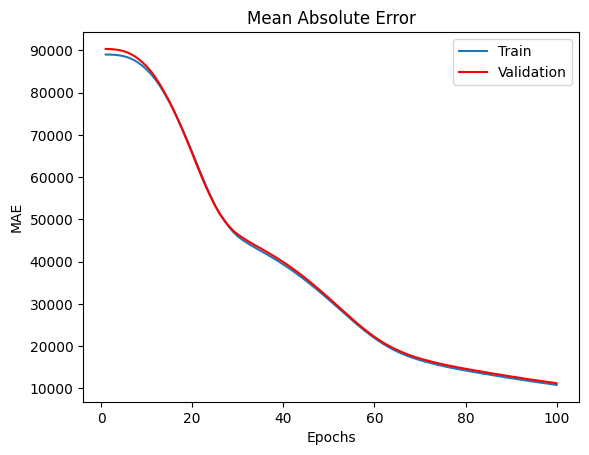

In [64]:
mae = regressor_history.history['mae']
val_mae = regressor_history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Mean Absolute Error')
plt.plot(epochs,mae,label='Train')
plt.plot(epochs,val_mae,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

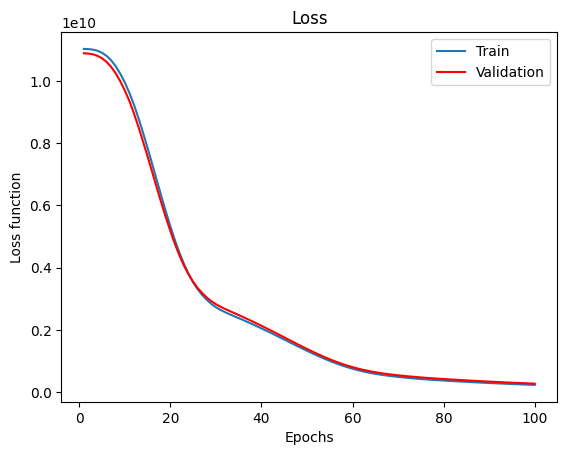

In [65]:
loss_function = regressor_history.history['loss']
val_loss_function = regressor_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss')
plt.plot(epochs,loss_function,label='Train')
plt.plot(epochs,val_loss_function,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()